In [3]:
from PIL import Image

# Open the base image
image = Image.open('/Volumes/RARH_incu/241023_96well/plate2/VID779_A1_1_01d00h00m.jpg')

# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A1_1_01d00h00m.tif')


# Convert the mask to RGBA if not already in that mode
mask = mask.convert("RGBA")

# Display the base image
image.show(title='Base Image')

# Display the mask
mask.show(title='Mask Image')

# Resize mask to match the image size if necessary
mask = mask.resize(image.size, Image.ANTIALIAS)

# Overlay the mask on the image using alpha compositing
combined = Image.alpha_composite(image.convert("RGBA"), mask)

# # Save the result
# combined.save('output_image.png', 'PNG')

# Display the result
combined.show(title='Combined Image')


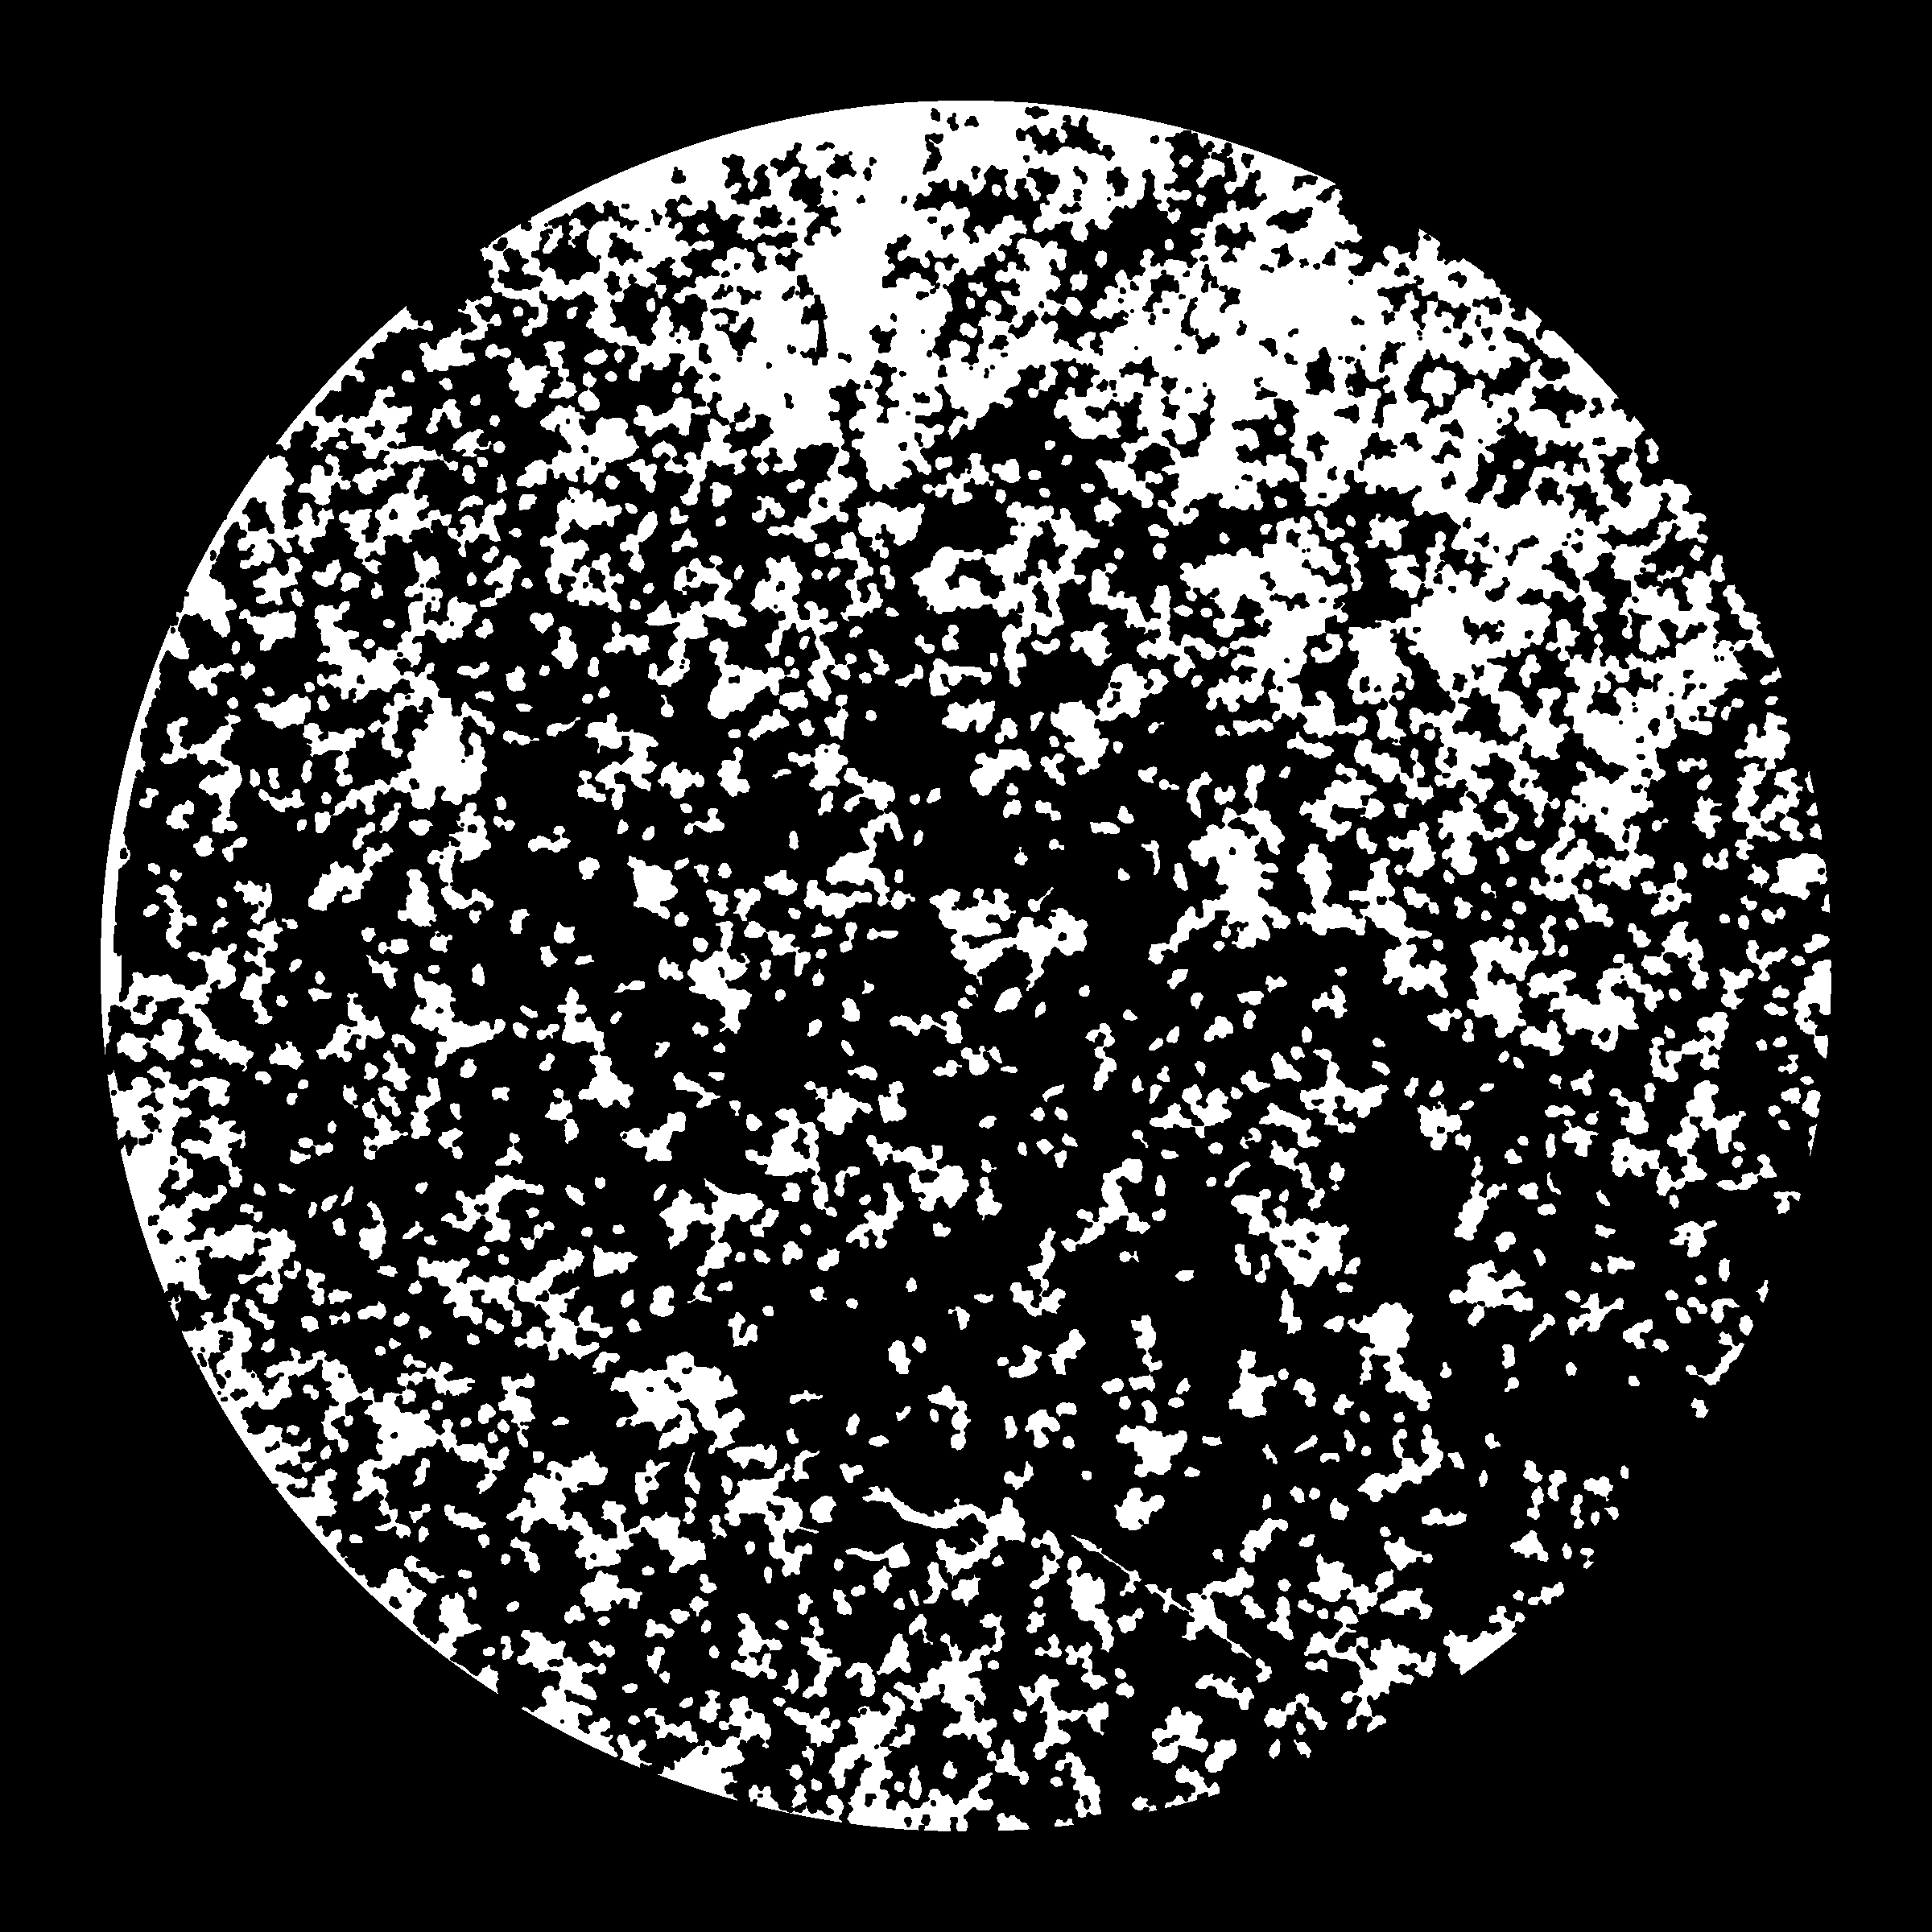

In [8]:
# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A1_1_01d00h00m.tif')

mask

In [39]:
from PIL import Image, ImageDraw

# Open the base image
image = Image.open('/Volumes/RARH_incu/241023_96well/plate2/VID779_A1_1_01d00h00m.jpg')

# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A1_1_01d00h00m.tif')


# Convert the mask to RGBA if not already in that mode
mask = mask.convert("RGBA")

# Display the base image
image.show(title='Base Image')

# Display the mask
mask.show(title='Mask Image')

# Resize mask to match the image size if necessary
mask = mask.resize(image.size, Image.ANTIALIAS)

# Calculate the square size and position
width, height = mask.size
square_size = min(width, height) // 2  # Size of the square is half of the smallest dimension
top_left = ((width - square_size) // 2, (height - square_size) // 2)  # Top left corner of the square
bottom_right = (top_left[0] + square_size, top_left[1] + square_size)  # Bottom right corner of the square

# Create a drawing context
draw = ImageDraw.Draw(mask)

# Draw a rectangle to "erase" that portion of the mask
draw.rectangle([top_left, bottom_right], fill=(0, 0, 0, 0))

# Overlay the updated mask on the image using alpha compositing
combined = Image.alpha_composite(image.convert("RGBA"), mask)

# Save the result
#combined.save('output_image_with_center_square_removed.png', 'PNG')

# Display the updated mask
mask.show(title='Updated Mask Image')

# Display the result
combined.show(title='Combined Image with Center Square Removed')

In [17]:
# Assuming 'mask' is your Image object:
pixels = mask.load()  # Create a pixel access object

# Access a specific pixel to see its value
x, y = 100, 100  # Coordinates for the pixel you want to check
print(pixels[x, y])

(0, 0, 0, 255)


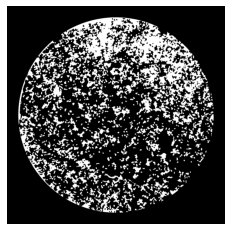

In [27]:
import numpy as np

# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A1_1_01d00h00m.tif')


# Convert the image to grayscale
gray_img = mask.convert('L')

# Convert the image to a numpy array
np_img = np.array(gray_img)

# Assume that the mask is represented by the non-zero (or white) pixels
# This will set all non-zero (white) pixels to 1 and all zero (black) pixels to 0
binary_mask = np.where(np_img > 0, 1, 0)

# Display the updated mask
mask.show(title='M')

import matplotlib.pyplot as plt

# Assuming binary_mask is the NumPy array you want to visualize
# ...

# Use Matplotlib to visualize the array
plt.imshow(binary_mask, cmap='gray')  # cmap='gray' displays the image in grayscale
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [28]:
# Find the indices of the mask (where the array is not zero)
mask_indices = np.argwhere(binary_mask == 1)

# Create an array X with two additional columns of zeros
X = np.zeros((mask_indices.shape[0], 4))
X[:,:2] = mask_indices

In [30]:
len(X)

1237744

In [31]:
import numpy as np
from scipy.ndimage import label, center_of_mass

# Assuming binary_mask is your binary mask numpy array with 1s for the mask and 0s for the background.
# ...

# Label connected components
labeled_array, num_features = label(binary_mask)

# Find the center of mass for each labeled component
centroids = center_of_mass(binary_mask, labeled_array, range(1, num_features + 1))

# Create an array to hold the unique ID and the x, y coordinates for each centroid
cluster_data = np.zeros((num_features, 3))

for i, centroid in enumerate(centroids):
    cluster_data[i] = [i+1, centroid[1], centroid[0]]  # i+1 is the unique ID, centroid[1] is x, centroid[0] is y

# Now, cluster_data contains unique ID and the centroid x, y coordinates of each connected component


In [33]:
len(cluster_data)

792

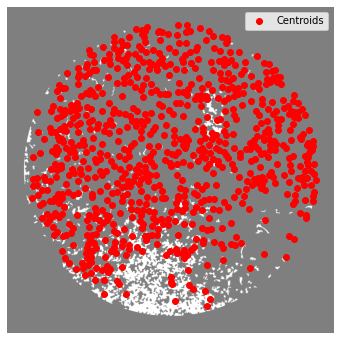

In [36]:

from PIL import Image

# Open the base image
image = Image.open('/Volumes/RARH_incu/241023_96well/plate2/VID779_A6_1_13d20h07m.jpg')

# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A6_1_13d20h07m.tif')

# Convert the image to grayscale
gray_img = mask.convert('L')

# Convert the image to a numpy array
np_img = np.array(gray_img)

# Assume that the mask is represented by the non-zero (or white) pixels
# This will set all non-zero (white) pixels to 1 and all zero (black) pixels to 0
binary_mask = np.where(np_img > 0, 1, 0)


# Label connected components
labeled_array, num_features = label(binary_mask)

# Find the center of mass for each labeled component
centroids = center_of_mass(binary_mask, labeled_array, range(1, num_features + 1))

# Create an array to hold the unique ID and the x, y coordinates for each centroid
cluster_data = np.zeros((num_features, 3))

for i, centroid in enumerate(centroids):
    cluster_data[i] = [i+1, centroid[1], centroid[0]]

# Extract x and y coordinates
x_coords = cluster_data[:, 1]
y_coords = cluster_data[:, 2]

# Plot the centroids
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c='red', label='Centroids')  # Red dots for centroids

# Assuming you want to also plot the original mask for reference
plt.imshow(binary_mask, cmap='gray', alpha=0.5)  # Show the binary mask in the background with some transparency

# Set plot details
plt.legend()
plt.axis('off')  # No axis for a cleaner look
plt.gca().invert_yaxis()  # Invert y-axis to match the image coordinates
plt.show()

In [37]:
labeled_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [38]:
num_features

792

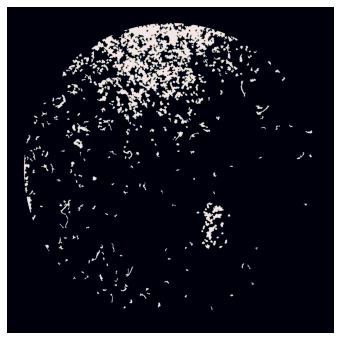

In [43]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original image
with Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A6_1_13d20h07m.tif') as orig_img:
    orig_img_array = np.array(orig_img)

# Assuming binary_mask is your binary mask numpy array
# ...

# Plot the original image
plt.figure(figsize=(8, 6))
plt.imshow(orig_img_array, cmap='gray')  # Assuming the original image is grayscale
plt.axis('off')  # Turn off axis ticks and labels for a cleaner look

# Overlay the binary mask with alpha=0.1
# Assuming that binary_mask contains only 0 and 1, where 1 corresponds to the mask
plt.imshow(binary_mask, cmap='jet', alpha=.1)  # 'jet' colormap for the mask, change as needed

# Show the plot
plt.show()

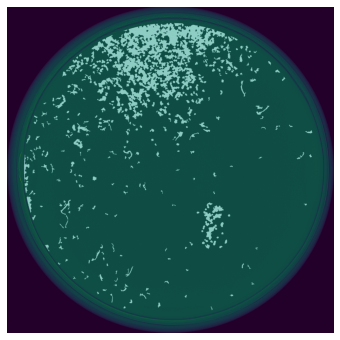

In [48]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original image
with Image.open('/Volumes/RARH_incu/241023_96well/plate2/VID779_A6_1_13d20h07m.jpg') as orig_img:  # Replace with your original image file path
    orig_img_array = np.array(orig_img)

# Load the mask image (assuming it's the same size as the original image)
with Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A6_1_13d20h07m.tif') as mask_img:  # The binary mask
    mask_array = np.array(mask_img)

# If the original image is in color (RGB) and the mask is grayscale,
# We need to make sure the mask is a boolean array for proper broadcasting
if len(orig_img_array.shape) == 3 and len(mask_array.shape) == 2:
    mask_array = mask_array > 0  # Convert mask to boolean array, assuming nonzero is mask

# Plot the original image
plt.figure(figsize=(8, 6))
plt.imshow(orig_img_array)
plt.axis('off')  # Turn off axis ticks and labels

# Overlay the binary mask with alpha=0.1
# mask_array is converted to float to work with the alpha channel during overlay
plt.imshow(mask_array.astype(float), cmap='gray', alpha=.5)  # Use 'gray' colormap for the mask overlay

# Show the plot
plt.show()

In [61]:
from PIL import Image
import numpy as np

# Load the mask image
with Image.open('/Volumes/RARH_incu/241023_96well/plate2/mask/VID779_A6_1_13d20h07m.tif') as img:
    mask = np.array(img)


# Check if the mask is grayscale (2D) and convert it to RGB (3D)
if len(mask.shape) == 2:
    # The mask is grayscale; stack it to create an RGB image
    mask = np.stack((mask,)*3, axis=-1)

# Create a new array for the green square
green_square = np.zeros_like(mask)

# Calculate the center and the size of the square
center_y, center_x = np.array(mask.shape[:2]) // 2
square_size = min(mask.shape[:2]) // 4  # Define the size of the square

# Define the coordinates of the top-left and bottom-right corners of the square
top_left = (center_y - square_size // 2, center_x - square_size // 2)
bottom_right = (center_y + square_size // 2, center_x + square_size // 2)

# Create the green square
green_square[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1], :] = [0, 255, 0]

# Change the value of the mask within the square to a new value (e.g., 200)
# Note: If the original mask is grayscale, the new value should also be grayscale.
# If you converted the mask to RGB, you'll need to apply the value to all channels.
mask_value_to_keep_track = 100
mask[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1], 2] = mask[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1], 2]*[mask_value_to_keep_track]

# Blend the original mask with the green square
# mask_with_green_square = np.where(green_square.any(-1), green_square, mask)

# Save or show the result
result_img = Image.fromarray(mask.astype(np.uint8))
result_img.show()  

In [83]:
import numpy as np
from scipy.ndimage import label
from scipy.spatial.distance import cdist

# Assuming binary_mask is already defined and is a binary mask of your image
labeled_array, num_features = label(binary_mask)
mask_s = binary_mask*0

points_in_colony = [(400,481),(1300,1100),(2300,2100),(1300,500)]

for pointy in points_in_colony:
    # Specify the target point (y, x)
    target_point = pointy

    # Initialize the minimum distance to a high value
    min_distance = np.inf
    nearest_label = None
    nearest_pixel = None

    # Iterate over each unique label to find the nearest labeled pixel
    for label_num in range(1, num_features+1):
        # Extract the pixel positions of the current label
        y_positions, x_positions = np.where(labeled_array == label_num)

        # Check if we have any pixels for this label
        if y_positions.size > 0:
            # Stack them into (y, x) format
            label_positions = np.column_stack((y_positions, x_positions))

            # Compute all distances from the target point to the pixels of the current label
            distances = cdist([target_point], label_positions)

            # Find the minimum distance and the corresponding pixel for the current label
            current_min_distance = distances.min()
            min_index = distances.argmin()

            # If this is the smallest distance so far, update the nearest_pixel and nearest_label
            if current_min_distance < min_distance:
                min_distance = current_min_distance
                nearest_label = label_num
                nearest_pixel = label_positions[min_index]
                
    mask_s[labeled_array == nearest_label] = 1

    # nearest_label is the label of the nearest connected component
    # nearest_pixel is the (y, x) of the nearest pixel within that component
    print(f"The nearest labeled pixel is at position {nearest_pixel} with label {nearest_label}")
    

The nearest labeled pixel is at position [400 481] with label 30
The nearest labeled pixel is at position [1353 1133] with label 237
The nearest labeled pixel is at position [2041 1816] with label 311
The nearest labeled pixel is at position [1295  508] with label 227


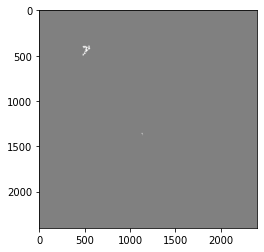

In [73]:
# mask_array is converted to float to work with the alpha channel during overlay
plt.imshow(mask_s.astype(float), cmap='gray', alpha=.5)  # Use 'gray' colormap for the mask overlay

# Show the plot
plt.show()

In [85]:
import numpy as np
from scipy.ndimage import label
from scipy.spatial import cKDTree


In [100]:
# Assuming binary_mask is already defined and is a binary mask of your image
labeled_array, num_features = label(binary_mask)
mask_s = binary_mask*0

points_in_colony = [(400,481),(1300,1100),(2300,2100),(1300,500)]


# Initialize variables to store the minimum distance and the nearest point information
min_distance = np.inf
nearest_label = None
nearest_pixel = None

# Create an empty list to store the pixel positions for each label
label_positions = []

# Create a list of labels
labels = range(1, num_features + 1)

# Extract the pixel positions of all labels in one go
y_positions, x_positions = np.where(np.isin(labeled_array, labels))
all_label_positions = np.column_stack((y_positions, x_positions))
all_labels = labeled_array[y_positions, x_positions]

# Construct a KDTree for efficient nearest neighbor search
tree = cKDTree(all_label_positions)
cnt = 1
for pointy in points_in_colony:
    cnt *= 2
    # Specify the target point (y, x)
    target_point = pointy

    

    # Query the nearest point to the target_point
    distance, index = tree.query([target_point])

    # Retrieve the nearest pixel and its label
    nearest_pixel = all_label_positions[index]
    nearest_label = all_labels[index]
    
    mask_s[labeled_array == nearest_label] = cnt
    # Now nearest_label is the label of the nearest connected component
    # and nearest_pixel is the (y, x) of the nearest pixel within that component
    print(f"The nearest labeled pixel is at position {nearest_pixel} with label {nearest_label}")


The nearest labeled pixel is at position [[400 481]] with label [30]
The nearest labeled pixel is at position [[1353 1133]] with label [237]
The nearest labeled pixel is at position [[2041 1816]] with label [311]
The nearest labeled pixel is at position [[1295  508]] with label [227]


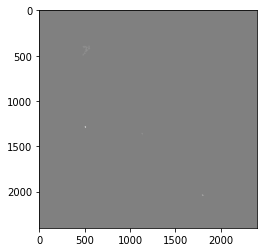

In [101]:
# mask_array is converted to float to work with the alpha channel during overlay
plt.imshow(mask_s.astype(float), cmap='gray', alpha=.5)  # Use 'gray' colormap for the mask overlay

# Show the plot
plt.show()

In [80]:
p[[True,False, True],:]

array([[1, 2],
       [5, 6]])

In [112]:
points_in_colony = [tuple(point) for point in p[np.array([1,2,3]) == 1,:]]

In [114]:
[tuple(point) for point in p[np.array([1,2,1]) == 1,:]]

[(1, 2), (5, 6)]

In [115]:
 p

array([[1, 2],
       [3, 4],
       [5, 6]])

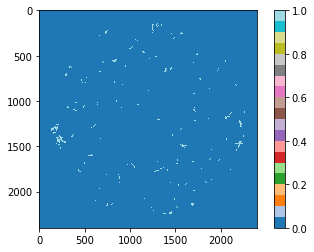

In [137]:

# Load the array from 'file.npy'
array = np.load('/Volumes/RARH_incu/241023_96well/plate1/clean_mask/A4/mask_cleanVID778_A4_1_13d19h58m.npy')

# Plot the array
plt.imshow(array, cmap='tab20', interpolation='nearest')
plt.colorbar()
plt.show()

In [144]:
import numpy as np
from matplotlib.path import Path


# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate1/mask/VID778_A4_1_13d19h58m.tif')

# Convert the image to grayscale
gray_img = mask.convert('L')

# Convert the image to a numpy array
np_img = np.array(gray_img)

# Assume that the mask is represented by the non-zero (or white) pixels
# This will set all non-zero (white) pixels to 1 and all zero (black) pixels to 0
binary_polygon = np.where(np_img > 0, 1, 0)


# Define the vertices of the polygon
polygon_vertices = np.load('/Volumes/RARH_incu/241023_96well/plate1/clean_mask/A4/LasoVID778_A4_1_13d19h58m.npy')
polygon_vertices = polygon_vertices[0]

# Create a matplotlib path from the vertices
polygon_path = Path(polygon_vertices)

# Create a grid of points representing the indices in your array
y, x = np.mgrid[:binary_polygon.shape[0], :binary_polygon.shape[1]]
grid_points = np.vstack((x.ravel(), y.ravel())).T

# Test which points are inside the polygon path
inside_polygon = polygon_path.contains_points(grid_points)

# Reshape the result back to the shape of your binary_polygon array
inside_polygon_mask = inside_polygon.reshape(binary_polygon.shape)

# Now inside_polygon_mask is a binary mask of the same shape as binary_polygon,
# with True for pixels inside the polygon, and False outside
polygon_pixels = np.argwhere(inside_polygon_mask)

# Convert it to a list of tuples if needed
polygon_pixel_list = list(map(tuple, polygon_pixels))

# # Print or use the pixel coordinates as needed
# for pixel in polygon_pixel_list:
#     print(pixel)

In [149]:
polygon_vertices

array([[1211.87080542,  411.73360414],
       [1211.87080542,  411.73360414],
       [1209.02144043,  411.73360414],
       [1206.17207544,  411.73360414],
       [1203.32271045,  411.73360414],
       [1203.32271045,  411.73360414],
       [1203.32271045,  411.73360414],
       [1200.47334546,  411.73360414],
       [1200.47334546,  411.73360414],
       [1197.62398047,  411.73360414],
       [1191.92525049,  411.73360414],
       [1189.07588549,  411.73360414],
       [1186.2265205 ,  408.88423915],
       [1183.37715551,  408.88423915],
       [1177.67842553,  406.03487416],
       [1174.82906054,  406.03487416],
       [1171.97969555,  406.03487416],
       [1163.43160058,  403.18550917],
       [1160.58223559,  400.33614417],
       [1152.03414062,  400.33614417],
       [1149.18477563,  397.48677918],
       [1146.33541064,  397.48677918],
       [1140.63668066,  394.63741419],
       [1140.63668066,  394.63741419],
       [1134.93795067,  391.7880492 ],
       [1129.23922069,  3

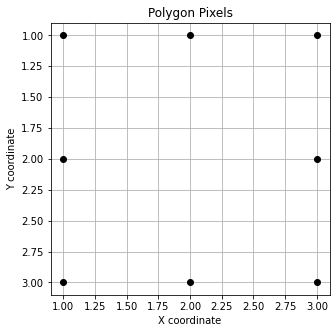

In [145]:

# Example binary polygon array
binary_polygon = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

# Find the indices of the pixels that are 1 (inside the polygon)
polygon_pixels = np.argwhere(binary_polygon == 1)

# Separate the columns into two variables for plotting
y_pixels, x_pixels = polygon_pixels[:, 0], polygon_pixels[:, 1]

# Plot the positions of the pixels
plt.figure(figsize=(5, 5))
plt.plot(x_pixels, y_pixels, 'o', color='black')  # 'o' denotes the marker style
plt.gca().invert_yaxis()  # Invert the y-axis to match the image coordinate system
plt.title('Polygon Pixels')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True)
plt.show()

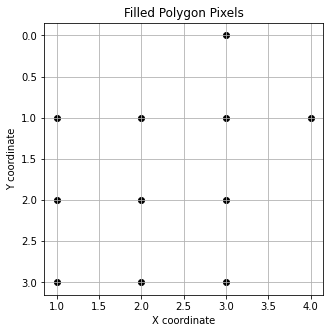

In [148]:
from scipy.ndimage import binary_fill_holes

# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate1/mask/VID778_A4_1_13d19h58m.tif')

# Convert the image to grayscale
gray_img = mask.convert('L')

# Convert the image to a numpy array
np_img = np.array(gray_img)

# Assume that the mask is represented by the non-zero (or white) pixels
# This will set all non-zero (white) pixels to 1 and all zero (black) pixels to 0
binary_polygon = np.where(np_img > 0, 1, 0)



# Fill the holes in the binary polygon to get the filled polygon
filled_polygon = binary_fill_holes(binary_polygon).astype(int)

# Find the indices of the pixels inside the filled polygon
filled_polygon_pixels = np.argwhere(filled_polygon == 1)

# Separate the columns into two variables for plotting
y_pixels, x_pixels = filled_polygon_pixels[:, 0], filled_polygon_pixels[:, 1]

# Plot the positions of the pixels
plt.figure(figsize=(5, 5))
plt.scatter(x_pixels, y_pixels, color='black')  # Scatter plot for the filled area
plt.gca().invert_yaxis()  # Invert the y-axis to match image coordinate system
plt.title('Filled Polygon Pixels')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True)
plt.show()

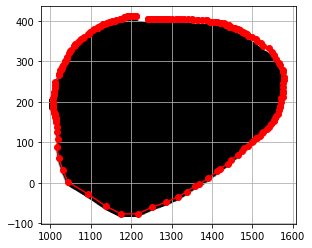

In [152]:
# This is an example polygon vertices array
# Replace this with your actual x, y array

# Define the vertices of the polygon
polygon_vertices = np.load('/Volumes/RARH_incu/241023_96well/plate1/clean_mask/A4/LasoVID778_A4_1_13d19h58m.npy')
polygon_vertices = polygon_vertices[0]

# Create a Path object from the vertices
polygon_path = Path(polygon_vertices)

# Create a grid of points that covers the entire space that the polygon might occupy
x, y = np.meshgrid(np.arange(np.min(polygon_vertices[:, 0]), np.max(polygon_vertices[:, 0]) + 1),
                   np.arange(np.min(polygon_vertices[:, 1]), np.max(polygon_vertices[:, 1]) + 1))

# Flatten the grid arrays and create a set of points (x, y)
points = np.vstack((x.flatten(), y.flatten())).T

# Use the Path object to test which points are inside the polygon
inside_polygon = polygon_path.contains_points(points)

# Reshape the result to have the same shape as the grid
inside_polygon = inside_polygon.reshape(x.shape)

# Plot the polygon and the points inside it
plt.figure()
plt.plot(polygon_vertices[:, 0], polygon_vertices[:, 1], 'ro-')  # The polygon vertices
plt.scatter(points[:, 0], points[:, 1], c=inside_polygon.flatten(), cmap='Greys')  # The points
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [153]:
points 

array([[1006.7165261 ,  -77.12801728],
       [1007.7165261 ,  -77.12801728],
       [1008.7165261 ,  -77.12801728],
       ...,
       [1576.7165261 ,  411.87198272],
       [1577.7165261 ,  411.87198272],
       [1578.7165261 ,  411.87198272]])

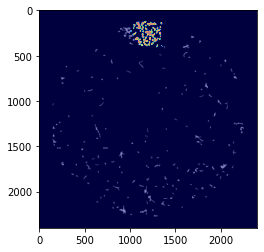

In [174]:
# Open the mask image
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate1/mask/VID778_A4_1_13d19h58m.tif')

# Convert the image to grayscale
gray_img = mask.convert('L')

# Convert the image to a numpy array
np_img = np.array(gray_img)

# Assume that the mask is represented by the non-zero (or white) pixels
# This will set all non-zero (white) pixels to 1 and all zero (black) pixels to 0
binary_mask = np.where(np_img > 0, 1, 0)
binary_mask= np.rot90(binary_mask, k=3)


# Define the vertices of the polygon
polygon_vertices = np.load('/Volumes/RARH_incu/241023_96well/plate1/clean_mask/A4/LasoVID778_A4_1_13d19h58m.npy')
polygon_vertices = polygon_vertices[0]

# Create a Path object from the vertices
polygon_path = Path(polygon_vertices)

# Generate a grid of points (coordinates) over the mask
# Assumes that the mask and image are of the same size
y, x = np.mgrid[:binary_mask.shape[0], :binary_mask.shape[1]]
points = np.c_[x.ravel(), y.ravel()]

# Determine which points are within the polygon
inside_polygon = polygon_path.contains_points(points)

# Reshape the result to match the binary mask's shape
inside_polygon_mask = inside_polygon.reshape(binary_mask.shape)

# Find the mask pixels that are inside the polygon
mask_inside_polygon = binary_mask * inside_polygon_mask

# At this point, mask_inside_polygon contains the mask pixels within the polygon
# Let's visualize it
import matplotlib.pyplot as plt

plt.imshow(binary_mask, cmap='gray')  # Display the original mask
plt.imshow(mask_inside_polygon, cmap='jet', alpha=0.5)  # Overlay the mask within the polygon
plt.show()

In [173]:
import numpy as np
from PIL import Image
from matplotlib.path import Path
import matplotlib.pyplot as plt
import time

# Start timing the process
start_time = time.time()

# Open the mask image using memory mapping to avoid reading the entire file into memory
mask = Image.open('/Volumes/RARH_incu/241023_96well/plate1/mask/VID778_H8_1_13d19h58m.tif')

# Convert the image to grayscale
gray_img = mask.convert('L')

# Convert the image to a numpy array
np_img = np.array(gray_img)

# Assume that the mask is represented by non-zero pixels
binary_mask = (np_img > 0).astype(np.uint8)

# Rotate the mask using np.rot90
#binary_mask = np.rot90(binary_mask, k=3)

# Load the polygon vertices and create a Path object
polygon_vertices = np.load('/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_H8_1_13d19h58m.npy')
polygon_vertices = polygon_vertices[0]
polygon_path = Path(polygon_vertices)

# Generate a boolean mask of points inside the polygon
# This approach uses broadcasting and is much faster
x, y = np.meshgrid(np.arange(binary_mask.shape[1]), np.arange(binary_mask.shape[0]))
points = np.vstack((x.ravel(), y.ravel())).T
inside_polygon = polygon_path.contains_points(points)

# Reshape the boolean array and use it to index the binary mask
mask_inside_polygon = binary_mask & inside_polygon.reshape(binary_mask.shape)

# Visualize the result
plt.imshow(binary_mask, cmap='gray')
plt.imshow(mask_inside_polygon, cmap='jet', alpha=0.5)
plt.show()

# End timing the process
end_time = time.time()
print(f"Process took {end_time - start_time} seconds.")


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_H8_1_13d19h58m.npy'

In [171]:
import pickle

# Use pickle to load
with open('/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_H9_1_13d19h58m.pkl', 'rb') as f:
    loaded_larrays = pickle.load(f)

In [172]:
loaded_larrays

[array([[2057.68415302,  959.81420547],
        [2057.68415302,  965.37504021],
        [2052.12331828,  973.71629233],
        [2046.56248353,  979.27712707],
        [2035.44081405,  984.83796182],
        [2029.8799793 ,  984.83796182],
        [2018.75830981,  987.61837919],
        [1988.17371872,  990.39879656],
        [1968.71079712,  990.39879656],
        [1924.22411916,  987.61837919],
        [1907.54161493,  982.05754444],
        [1896.41994544,  976.4967097 ],
        [1871.3961891 ,  954.25337072],
        [1865.83535435,  943.13170124],
        [1857.49410224,  918.10794489],
        [1854.71368486,  909.76669277],
        [1854.71368486,  895.86460591],
        [1851.93326749,  859.71918008],
        [1851.93326749,  851.37792796],
        [1857.49410224,  831.91500635],
        [1863.05493698,  818.01291949],
        [1874.17660647,  804.11083263],
        [1915.88286705,  770.74582417],
        [1929.78495391,  762.40457205],
        [1949.24787551,  754.06331994],
